In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

engine.dispose()

life_expect = pd.read_sql_query('select * from lifeexpectancy', con = engine)

In [159]:
life_expect.columns = life_expect.columns.str.replace(' ', '')

In [160]:
life_expect.columns = map(str.lower, life_expect.columns)

In [161]:
life_expect.columns

Index(['country', 'year', 'status', 'lifeexpectancy', 'adultmortality',
       'infantdeaths', 'alcohol', 'percentageexpenditure', 'hepatitisb',
       'measles', 'bmi', 'under-fivedeaths', 'polio', 'totalexpenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness1-19years',
       'thinness5-9years', 'incomecompositionofresources', 'schooling'],
      dtype='object')

* Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

* Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

* In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

* Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

In [162]:
life_expect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
country                         2938 non-null object
year                            2938 non-null int64
status                          2938 non-null object
lifeexpectancy                  2928 non-null float64
adultmortality                  2928 non-null float64
infantdeaths                    2938 non-null int64
alcohol                         2744 non-null float64
percentageexpenditure           2938 non-null float64
hepatitisb                      2385 non-null float64
measles                         2938 non-null int64
bmi                             2904 non-null float64
under-fivedeaths                2938 non-null int64
polio                           2919 non-null float64
totalexpenditure                2712 non-null float64
diphtheria                      2919 non-null float64
hiv/aids                        2938 non-null float64
gdp                             2490 no

Categorical: Country [count = 193] , year[count = 16], status[count = 2 / Developing or Developed], 

Continuous: All other columns

First Brush decent distribution first columns: life expectency, adult mortality, alcohol, BMI, total expenditure

One's for hypothetical examination : population size & GDP, 

Ideal Cleaning tasks = Jupyter Labs

Nulls: Life expectancy  / Adult Mortality / Alcohol / Hepatitis B / BMI / Polio / Total expenditure / Diptheria / GDP / Population / thinness 1-19 years / thinness 5-9 years / Income composition of resources / Schooling

## Detecting Problems with the Data

__Problems with the Data__ : Here I am testing to see if there are any numerical values that aren't being picked up by null that are non-representative of the data set. Everything looks pretty good, I feel confident there aren't any misc or meaningless entries in these columns.

In [163]:
for column_name in ['year', 'lifeexpectancy', 'adultmortality',
       'infantdeaths', 'alcohol', 'percentageexpenditure', 'hepatitisb',
       'measles', 'bmi', 'under-fivedeaths', 'polio', 'totalexpenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness1-19years',
       'thinness5-9years', 'incomecompositionofresources', 'schooling']:
    print("These are the problematic values for the variable: {}".format(column_name))
    for value in life_expect[column_name]:
        try:
            float(value)
        except:
            print(value)

These are the problematic values for the variable: year
These are the problematic values for the variable: lifeexpectancy
These are the problematic values for the variable: adultmortality
These are the problematic values for the variable: infantdeaths
These are the problematic values for the variable: alcohol
These are the problematic values for the variable: percentageexpenditure
These are the problematic values for the variable: hepatitisb
These are the problematic values for the variable: measles
These are the problematic values for the variable: bmi
These are the problematic values for the variable: under-fivedeaths
These are the problematic values for the variable: polio
These are the problematic values for the variable: totalexpenditure
These are the problematic values for the variable: diphtheria
These are the problematic values for the variable: hiv/aids
These are the problematic values for the variable: gdp
These are the problematic values for the variable: population
These ar

__Problems with the Data__ : I used .isna() and .mean() multiplied by 100 to determine a rough percentage of missing values and found a few key data points at the top with a relatively high percentage of missing values.

In [179]:
percent_null_by_column = life_expect.isna().mean().sort_values(ascending=False)*100

print(percent_null_by_column)

population                      22.191967
hepatitisb                      18.822328
gdp                             15.248468
totalexpenditure                 7.692308
alcohol                          6.603131
incomecompositionofresources     5.684139
schooling                        5.547992
bmi                              1.157250
thinness1-19years                1.157250
thinness5-9years                 1.157250
diphtheria                       0.646698
polio                            0.646698
adultmortality                   0.340368
lifeexpectancy                   0.340368
under-fivedeaths                 0.000000
hiv/aids                         0.000000
measles                          0.000000
percentageexpenditure            0.000000
infantdeaths                     0.000000
status                           0.000000
year                             0.000000
country                          0.000000
dtype: float64


__Problems with the Data__ : here we see the variables 'population', 'hepatitisb', and 'gdp' have 15%+ null values in their rows. To a lessor extent, but likely too significant to drop, 'schooling', 'incomecompositionofresources', 'alcohol', and 'totalexpenditure' have over 5% null values in their rows. I will analyze these findings further below

### Analyzing missing data in aforementioned columns

__Problems with the Data__ : the variable pop_null is being used to create a dataframe that has only the countries that register with a population of NaN. I wanted to see which countries were in this category to decipher whether or not it was unique to smaller countries of if this represented a different type of missing value.

In [165]:
pop_null = life_expect[life_expect["population"].isna() == True]

pop_null['country'].unique()

array(["Côte d'Ivoire", 'Antigua and Barbuda', 'Bahamas', 'Bahrain',
       'Barbados', 'Bolivia (Plurinational State of)',
       'Brunei Darussalam', 'Congo', 'Cook Islands', 'Cuba', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Dominica', 'Egypt',
       'Slovakia', 'Eritrea', 'Gambia', 'Grenada',
       'Iran (Islamic Republic of)', 'Kuwait', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Libya', 'Marshall Islands',
       'Micronesia (Federated States of)', 'Monaco', 'Nauru',
       'New Zealand', 'Niue', 'Oman', 'Qatar', 'Republic of Korea',
       'Republic of Moldova', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'San Marino', 'Saudi Arabia',
       'Singapore', 'Somalia',
       'The former Yugoslav republic of Macedonia',
       'United Arab Emirates',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of Am

__Problems with the Data__ : I wanted to see if this was representative of all the population counts for the United States or if it was just one or two years.

In [166]:
usa = life_expect[life_expect['country'] == 'United States of America'] 
usa.head()

,country,year,status,lifeexpectancy,adultmortality,infantdeaths,alcohol,percentageexpenditure,hepatitisb,measles,...,polio,totalexpenditure,diphtheria,hiv/aids,gdp,population,thinness1-19years,thinness5-9years,incomecompositionofresources,schooling
2794,United States of America,2015,Developed,79.3,13.0,23,NaN,0.0,92.0,188,...,93.0,NaN,95.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2795,United States of America,2014,Developed,79.1,14.0,23,8.82,0.0,92.0,667,...,93.0,17.14,95.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2796,United States of America,2013,Developed,78.9,16.0,23,8.82,0.0,91.0,187,...,93.0,16.90,94.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2797,United States of America,2012,Developed,78.8,16.0,24,8.82,0.0,9.0,55,...,93.0,17.20,94.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2798,United States of America,2011,Developed,78.7,16.0,25,8.67,0.0,91.0,220,...,94.0,17.60,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN


__Problems with the Data__ : It seems that population isn't recorded for the USA, and this is verified below where I decided to look at unique values in the array. 

This tells me that the missing data in this column is random. Since it's not unique for a single year, and country population can vary so drastically, I don't think we can fill the values accurately without it affected our data substantially. I believe population column should be dropped.

In [167]:
usa['population'].unique()

array([nan])

In [171]:
hep_null = life_expect[life_expect["hepatitisb"].isna() == True]

hep_null['country'].unique()

array(['Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Australia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados',
       'Benin', 'Bosnia and Herzegovina', 'Burkina Faso', 'Burundi',
       "Côte d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'Comoros', 'Congo',
       'Croatia', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Finland',
       'Gabon', 'Ghana', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India',
       'Ireland', 'Jamaica', 'Japan', 'Kenya',
       "Lao People's Democratic Republic", 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Malta', 'Mauritania',
       'Montenegro', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Netherlands', 'Niger', 'Nigeria', 'Norway', 'Pakistan', 'Panam

In [172]:
uk_hep = life_expect[life_expect['country'] == 'United Kingdom of Great Britain and Northern Ireland'] 
uk_hep.head()

,country,year,status,lifeexpectancy,adultmortality,infantdeaths,alcohol,percentageexpenditure,hepatitisb,measles,...,polio,totalexpenditure,diphtheria,hiv/aids,gdp,population,thinness1-19years,thinness5-9years,incomecompositionofresources,schooling
2762,United Kingdom of Great Britain and Northern I...,2015,Developed,81.2,69.0,3,10.66,0.0,NaN,91,...,96.0,NaN,96.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2763,United Kingdom of Great Britain and Northern I...,2014,Developed,81.0,71.0,3,10.37,0.0,NaN,133,...,95.0,9.12,95.0,0.1,NaN,NaN,0.8,0.5,NaN,NaN
2764,United Kingdom of Great Britain and Northern I...,2013,Developed,87.0,72.0,3,10.32,0.0,NaN,1919,...,95.0,9.34,95.0,0.1,NaN,NaN,0.8,0.5,NaN,NaN
2765,United Kingdom of Great Britain and Northern I...,2012,Developed,86.0,72.0,3,10.42,0.0,NaN,2092,...,95.0,9.41,95.0,0.1,NaN,NaN,0.8,0.5,NaN,NaN
2766,United Kingdom of Great Britain and Northern I...,2011,Developed,86.0,74.0,3,10.68,0.0,NaN,1112,...,95.0,9.34,95.0,0.1,NaN,NaN,0.8,0.5,NaN,NaN


__Problems with the Data__ : Looks like the UK has some issues with more than just null values in hepatitisb, so I think it will be a good country to test and discover some insights on additional null values.

In [190]:
unique_hep = uk_hep['hepatitisb'].nunique()
unique_gdp = uk_hep['gdp'].nunique()
unique_totalexpend = uk_hep['totalexpenditure'].nunique()
unique_alcohol = uk_hep['alcohol'].nunique()
unique_school = uk_hep['schooling'].nunique()
unique_incomecomp = uk_hep['incomecompositionofresources'].nunique()

print('{} is the number of unique hep B values for the UK'.format(unique_hep))
print('{} is the number of unique gdp values for the UK'.format(unique_gdp))
print('{} is the number of unique totalexpenditure values for the UK'.format(unique_totalexpend))
print('{} is the number of unique alcohol values for the UK'.format(unique_alcohol))
print('{} is the number of unique schooling values for the UK'.format(unique_school))
print('{} is the number of unique incomecompositionofresources values for the UK'.format(unique_incomecomp))

0 is the number of unique hep B values for the UK
0 is the number of unique gdp values for the UK
14 is the number of unique totalexpenditure values for the UK
16 is the number of unique alcohol values for the UK
0 is the number of unique schooling values for the UK
0 is the number of unique incomecompositionofresources values for the UK


In [191]:
uk_hep.isna().mean().sort_values(ascending=False)*100

schooling                       100.00
hepatitisb                      100.00
population                      100.00
gdp                             100.00
incomecompositionofresources    100.00
totalexpenditure                  6.25
year                              0.00
status                            0.00
lifeexpectancy                    0.00
adultmortality                    0.00
infantdeaths                      0.00
alcohol                           0.00
percentageexpenditure             0.00
bmi                               0.00
measles                           0.00
under-fivedeaths                  0.00
polio                             0.00
diphtheria                        0.00
hiv/aids                          0.00
thinness1-19years                 0.00
thinness5-9years                  0.00
country                           0.00
dtype: float64

__Problems with the Data__ : This provided some interesting information to work from! Looks like totalexpenditure and alcohol have the potential for their missing values to be replaced while the other data (aside from population), deserves closer scrutiny on why it's missing. UK provides a good benchmark as a well developed country where many of these values should be input but are missing.

I will test the same values above using the USA as a second benchmark, minus population.

In [189]:
unique_hep = usa['hepatitisb'].nunique()
unique_gdp = usa['gdp'].nunique()
unique_totalexpend = usa['totalexpenditure'].nunique()
unique_alcohol = usa['alcohol'].nunique()
unique_school = usa['schooling'].nunique()
unique_incomecomp = usa['incomecompositionofresources'].nunique()

print('{} is the number of unique hep B values for the US'.format(unique_hep))
print('{} is the number of unique gdp values for the US'.format(unique_gdp))
print('{} is the number of unique totalexpenditure values for the US'.format(unique_totalexpend))
print('{} is the number of unique alcohol values for the US'.format(unique_alcohol))
print('{} is the number of unique schooling values for the US'.format(unique_school))
print('{} is the number of unique incomecompositionofresources values for the US'.format(unique_incomecomp))

7 is the number of unique hep B values for the US
0 is the number of unique gdp values for the US
14 is the number of unique totalexpenditure values for the US
12 is the number of unique alcohol values for the US
0 is the number of unique schooling values for the US
0 is the number of unique incomecompositionofresources values for the US


In [192]:
usa.isna().mean().sort_values(ascending=False)*100

schooling                       100.00
population                      100.00
gdp                             100.00
incomecompositionofresources    100.00
totalexpenditure                  6.25
alcohol                           6.25
hepatitisb                        0.00
year                              0.00
status                            0.00
lifeexpectancy                    0.00
adultmortality                    0.00
infantdeaths                      0.00
percentageexpenditure             0.00
bmi                               0.00
measles                           0.00
under-fivedeaths                  0.00
polio                             0.00
diphtheria                        0.00
hiv/aids                          0.00
thinness1-19years                 0.00
thinness5-9years                  0.00
country                           0.00
dtype: float64

__Problems with the Data__ : after running null percentage counts I'm read to make some decisions for each of these columns.

1.) Features I will be dropping: Population, Schooling, incomecompoisitionofresources, hepatitisb, and GDP. With 100% null values for each of these between the USA and UK (except hepb), and high null % across the data set these seem to be difficult missing values to fill, and with so many variables I feel like there are plenty others with which to draw correlations.

Due to the vast number of other features to compare with and the massive lack of hepb data in the UK (and likely other countries) I don't believe there will be a reliable method to fill the nulls. 

Note: population also seems to wildly variant between years as well. It doesn't seem like a consistent variable to use.

2.) Features I will work on to interpolate, imputate, or drop rows from: totalexpenditure, alcohol, bmi, thinness1-19years,       thinness5-9years, diphtheria, polio, adultmortality, lifeexpectancy.

In [200]:
life_expect_clean = life_expect[['country', 'year', 'status', 'lifeexpectancy', 'adultmortality',
       'infantdeaths', 'alcohol', 'percentageexpenditure', 'measles', 'bmi', 'under-fivedeaths', 'polio', 'totalexpenditure',
       'diphtheria', 'hiv/aids', 'thinness1-19years',
       'thinness5-9years']]

### Interpolate, Imputate, or Drop

In [ ]:
['lifeexpectancy', 'adultmortality','alcohol', 'bmi', 'polio', 'totalexpenditure',
       'diphtheria', 'alcohol', 'thinness1-19years',
       'thinness5-9years']

In [201]:
percent_null_by_column = life_expect_clean.isna().mean().sort_values(ascending=False)*100

print(percent_null_by_column)

totalexpenditure         7.692308
alcohol                  6.603131
thinness5-9years         1.157250
bmi                      1.157250
thinness1-19years        1.157250
diphtheria               0.646698
polio                    0.646698
adultmortality           0.340368
lifeexpectancy           0.340368
year                     0.000000
status                   0.000000
measles                  0.000000
infantdeaths             0.000000
percentageexpenditure    0.000000
under-fivedeaths         0.000000
hiv/aids                 0.000000
country                  0.000000
dtype: float64


In [218]:
life_expect_clean.tail(50)

,country,year,status,lifeexpectancy,adultmortality,infantdeaths,alcohol,percentageexpenditure,measles,bmi,under-fivedeaths,polio,totalexpenditure,diphtheria,hiv/aids,thinness1-19years,thinness5-9years
2888,Viet Nam,2001,Developing,73.6,138.0,32,1.840000,0.000000,12058,9.6,41,96.0,5.17000,96.0,0.1,15.7,16.4
2889,Viet Nam,2000,Developing,73.4,139.0,33,1.600000,0.000000,16512,9.2,43,96.0,4.89000,96.0,0.1,15.8,16.4
2890,Yemen,2015,Developing,65.7,224.0,37,4.602861,0.000000,468,41.3,47,63.0,5.93819,69.0,0.1,13.6,13.4
2891,Yemen,2014,Developing,65.4,228.0,37,0.010000,0.000000,815,4.4,47,67.0,5.64000,73.0,0.1,13.7,13.5
2892,Yemen,2013,Developing,65.4,226.0,36,0.040000,0.000000,400,39.6,46,67.0,5.78000,73.0,0.1,13.7,13.5
2893,Yemen,2012,Developing,64.7,236.0,36,0.040000,0.000000,2177,38.7,46,68.0,5.73000,67.0,0.1,13.7,13.6
2894,Yemen,2011,Developing,64.6,234.0,35,0.040000,0.000000,2676,37.9,45,69.0,5.40000,69.0,0.1,13.7,13.6
2895,Yemen,2010,Developing,64.4,233.0,35,0.060000,0.000000,510,37.2,45,77.0,5.17000,76.0,0.1,13.7,13.7
2896,Yemen,2009,Developing,64.1,235.0,36,0.030000,0.000000,130,36.4,46,76.0,5.32000,76.0,0.1,13.8,13.7
2897,Yemen,2008,Developing,63.8,238.0,37,0.040000,0.000000,7,35.7,47,78.0,5.12000,78.0,0.1,13.8,13.7


Based on head & tail information:

Data that appears have have a linear correlation with time (Interpolate): bmi,lifeexpectancy, thinness1-19years,	thinness5-9years

Data that is more or less random in relation to year (Imputate): percentageexpenditure, measles, alcohol, underfivedeaths (mode), totalexpenditure, diptheria, polio, adultmortality(mode) 



#### Filling the imputated values

In [216]:
life_expect_clean['percentageexpenditure'].fillna(value = life_expect_clean['percentageexpenditure'].mean(), inplace=True)

life_expect_clean['measles'].fillna(life_expect_clean['measles'].mean(), inplace=True)

life_expect_clean['adultmortality'].fillna(value = life_expect_clean['adultmortality'].mode(), inplace=True)

life_expect_clean['alcohol'].fillna(life_expect_clean['alcohol'].mean(), inplace=True)

life_expect_clean['under-fivedeaths'].fillna(life_expect_clean['under-fivedeaths'].mode(), inplace=True)

life_expect_clean['polio'].fillna(life_expect_clean['polio'].mean(), inplace=True)

life_expect_clean['diphtheria'].fillna(life_expect_clean['diphtheria'].mean(), inplace=True)

life_expect_clean['totalexpenditure'].fillna(life_expect_clean['totalexpenditure'].mean(), inplace=True)

In [217]:
percent_null_by_column_clean = life_expect_clean.isna().mean().sort_values(ascending=False)*100
print(percent_null_by_column_clean)

thinness5-9years         1.157250
bmi                      1.157250
thinness1-19years        1.157250
lifeexpectancy           0.340368
adultmortality           0.340368
alcohol                  0.000000
year                     0.000000
status                   0.000000
infantdeaths             0.000000
measles                  0.000000
percentageexpenditure    0.000000
under-fivedeaths         0.000000
polio                    0.000000
totalexpenditure         0.000000
diphtheria               0.000000
hiv/aids                 0.000000
country                  0.000000
dtype: float64


In [224]:
#want to drop these rows in particular
whats_missing = life_expect_clean[life_expect_clean['adultmortality'].isna()]

whats_missing.head()

,country,year,status,lifeexpectancy,adultmortality,infantdeaths,alcohol,percentageexpenditure,measles,bmi,under-fivedeaths,polio,totalexpenditure,diphtheria,hiv/aids,thinness1-19years,thinness5-9years
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,0,82.8,0,98.0,3.58,98.0,0.1,0.1,0.1
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,0,58.4,0,96.0,5.58,96.0,0.1,2.7,2.6
1651,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,0,81.6,0,79.0,17.24,79.0,0.1,0.1,0.1
1716,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,0,NaN,0,99.0,4.30,99.0,0.1,NaN,NaN
1813,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,0,87.3,0,87.0,4.65,87.0,0.1,0.1,0.1


In [231]:
#bmi,lifeexpectancy, thinness1-19years, thinness5-9years
life_expect_clean['bmi'].interpolate()

life_expect_clean['thinness1-19years'].interpolate()

life_expect_clean['thinness5-9years'].interpolate()

0       17.3
1       17.5
2       17.7
3       18.0
4       18.2
        ... 
2933     9.4
2934     9.9
2935     1.3
2936     1.7
2937    11.2
Name: thinness5-9years, Length: 2938, dtype: float64

In [232]:
percent_null_by_column_clean = life_expect_clean.isna().mean().sort_values(ascending=False)*100
print(percent_null_by_column_clean)

thinness5-9years         1.157250
bmi                      1.157250
thinness1-19years        1.157250
lifeexpectancy           0.340368
adultmortality           0.340368
alcohol                  0.000000
year                     0.000000
status                   0.000000
infantdeaths             0.000000
measles                  0.000000
percentageexpenditure    0.000000
under-fivedeaths         0.000000
polio                    0.000000
totalexpenditure         0.000000
diphtheria               0.000000
hiv/aids                 0.000000
country                  0.000000
dtype: float64


In [234]:
whats_missing_again = life_expect_clean[life_expect_clean['thinness1-19years'].isna()]

whats_missing_again.head()

,country,year,status,lifeexpectancy,adultmortality,infantdeaths,alcohol,percentageexpenditure,measles,bmi,under-fivedeaths,polio,totalexpenditure,diphtheria,hiv/aids,thinness1-19years,thinness5-9years
1716,Monaco,2013,Developing,NaN,NaN,0,0.010000,0.000000,0,NaN,0,99.0,4.30000,99.0,0.1,NaN,NaN
2217,San Marino,2013,Developing,NaN,NaN,0,0.010000,0.000000,0,NaN,0,69.0,6.50000,69.0,0.1,NaN,NaN
2409,South Sudan,2015,Developing,57.3,332.0,26,4.602861,0.000000,878,NaN,39,41.0,5.93819,31.0,3.4,NaN,NaN
2410,South Sudan,2014,Developing,56.6,343.0,26,4.602861,46.074469,441,NaN,39,44.0,2.74000,39.0,3.5,NaN,NaN
2411,South Sudan,2013,Developing,56.4,345.0,26,4.602861,47.444530,525,NaN,40,5.0,2.62000,45.0,3.6,NaN,NaN


After looking at the data and attempting interpolation, I'm going to drop these 6 columns as they won't impact the overall data in my dataframe and seem to be unique missing values.

In [239]:
life_expect_cleanest = life_expect_clean.dropna()

life_expect_cleanest.isna().sum()

country                  0
year                     0
status                   0
lifeexpectancy           0
adultmortality           0
infantdeaths             0
alcohol                  0
percentageexpenditure    0
measles                  0
bmi                      0
under-fivedeaths         0
polio                    0
totalexpenditure         0
diphtheria               0
hiv/aids                 0
thinness1-19years        0
thinness5-9years         0
dtype: int64

## Outliers

Categorical: Country [count = 193] , year[count = 16], status[count = 2 / Developing or Developed], 

Continuous: All other columns

To check for outliers, I'm running subplots for boxplots for all the continuous variables for an initial idea as to which have outliers and which don't

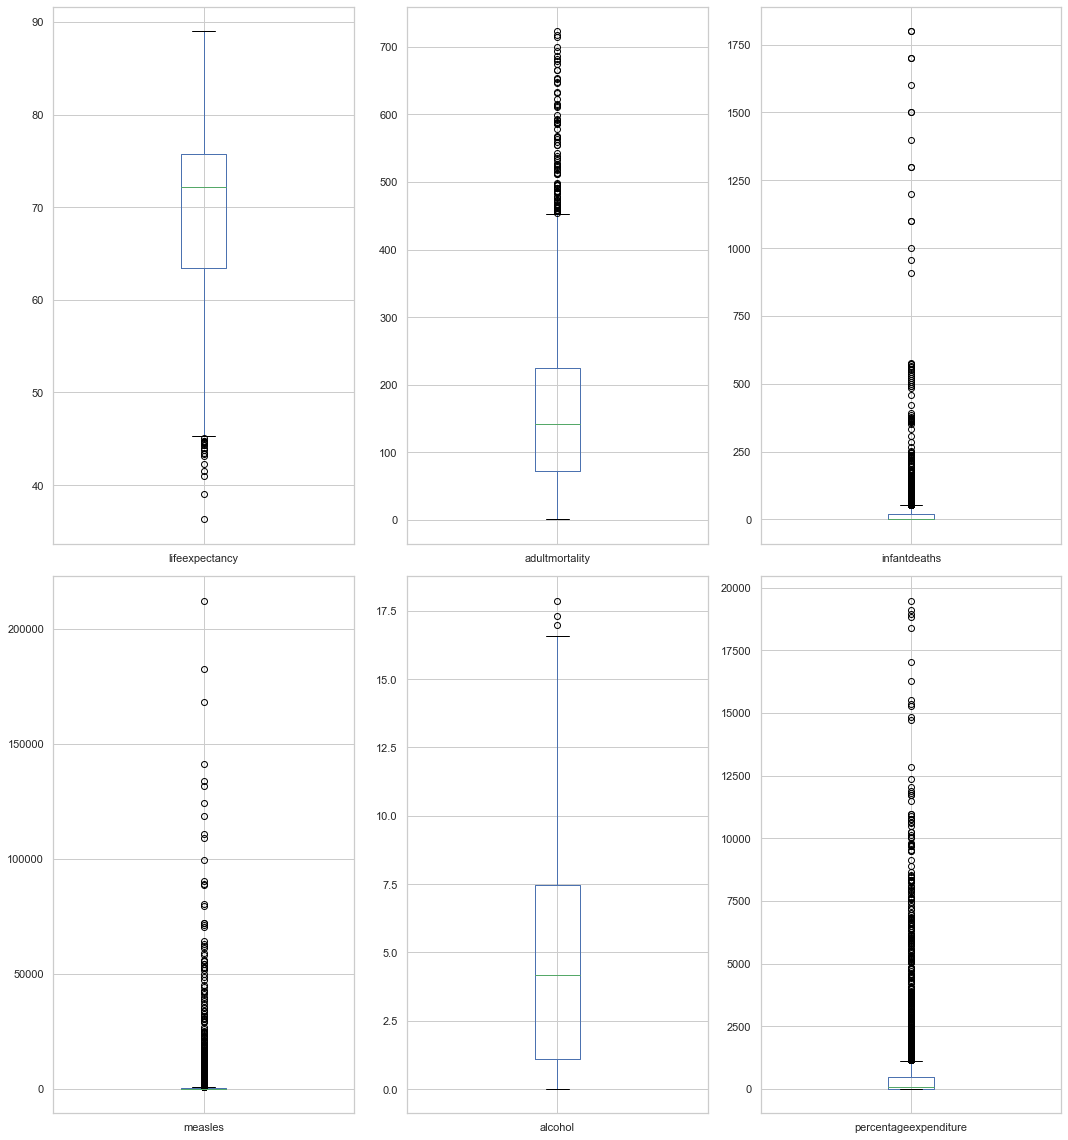

In [253]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,16)) # create 2x2 array of subplots

life_expect_cleanest.boxplot(column='lifeexpectancy', ax=axes[0,0]) # add boxplot to 1st subplot
life_expect_cleanest.boxplot(column='adultmortality', ax=axes[0,1]) # add boxplot to 2nd subplot
life_expect_cleanest.boxplot(column='infantdeaths', ax=axes[0,2]) # add boxplot to 1st subplot
life_expect_cleanest.boxplot(column='alcohol', ax=axes[1,1]) 
life_expect_cleanest.boxplot(column='percentageexpenditure', ax=axes[1,2]) 
life_expect_cleanest.boxplot(column='measles', ax=axes[1,0])

plt.tight_layout()
# etc.
plt.show()

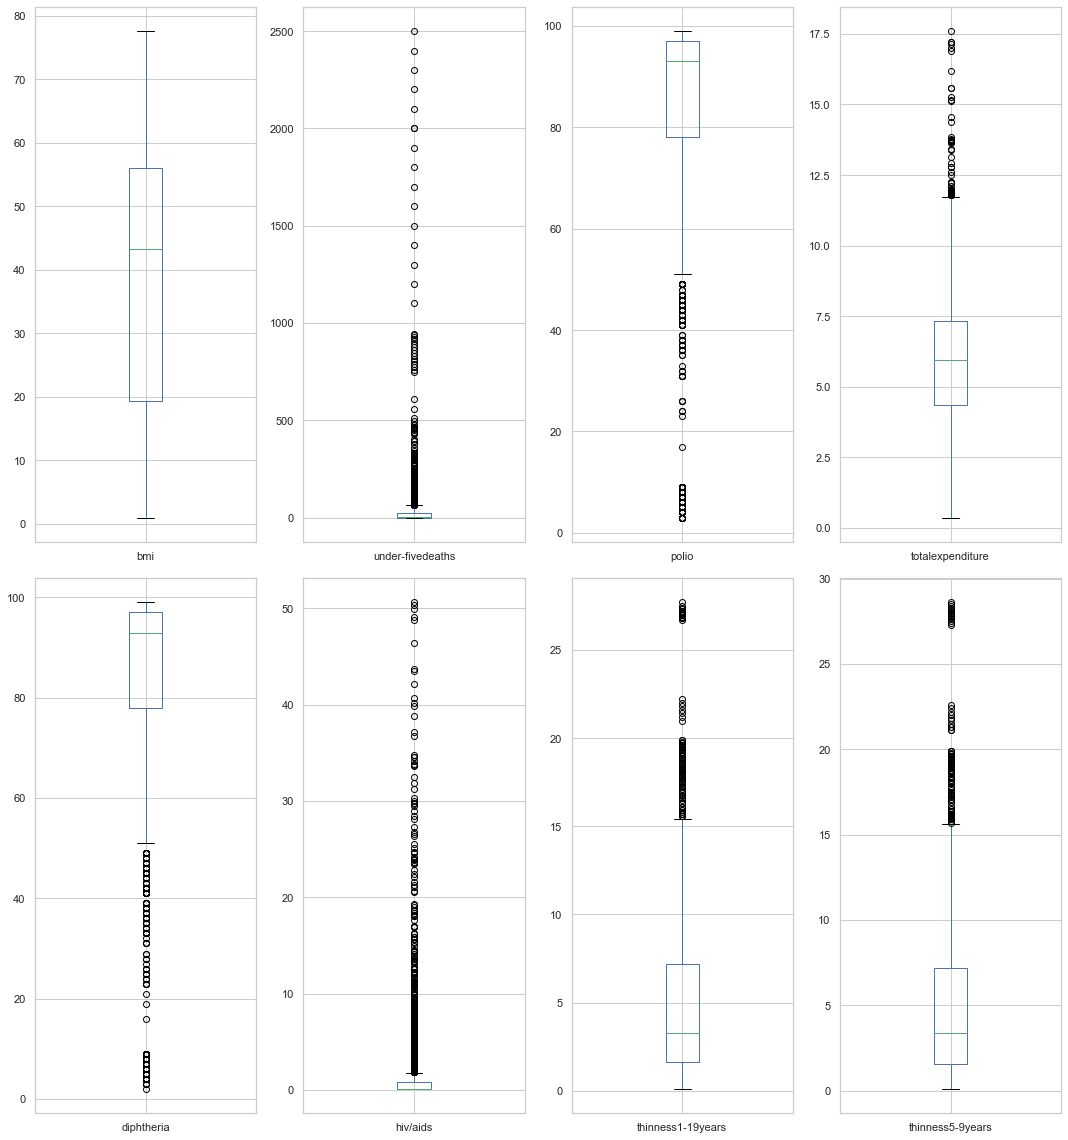

In [254]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,16)) # create 2x2 array of subplots

life_expect_cleanest.boxplot(column='bmi', ax=axes[0,0]) # add boxplot to 1st subplot
life_expect_cleanest.boxplot(column='under-fivedeaths', ax=axes[0,1]) # add boxplot to 2nd subplot
life_expect_cleanest.boxplot(column='polio', ax=axes[0,2]) # add boxplot to 1st subplot
life_expect_cleanest.boxplot(column='totalexpenditure', ax=axes[0,3]) 
life_expect_cleanest.boxplot(column='diphtheria', ax=axes[1,0]) 
life_expect_cleanest.boxplot(column='hiv/aids', ax=axes[1,1])
life_expect_cleanest.boxplot(column='thinness1-19years', ax=axes[1,2]) 
life_expect_cleanest.boxplot(column='thinness5-9years', ax=axes[1,3]) 


plt.tight_layout()
# etc.
plt.show()

I don't think dropping the values would be a good idea in this instance, since some developing countries may have disproportionally lower or higher values which would impact life expectancy.

In [ ]:
['lifeexpectancy', 'adultmortality',
       'infantdeaths', 'alcohol', 'percentageexpenditure', 'measles', 'bmi', 'under-fivedeaths', 'polio', 'totalexpenditure',
       'diphtheria', 'hiv/aids', 'thinness1-19years',
       'thinness5-9years']

One way (smol):'lifeexpectancy', 'diphtheria', 'polio'
One way (big): all else

In [284]:
smol_winsorized_views = winsorize(life_expect_cleanest[['lifeexpectancy', 'polio', 'diphtheria']], (0.05, 0))
winsorized_views

masked_array(
  data=[[6.50e+01, 2.63e+02, 6.20e+01, ..., 1.00e-01, 1.72e+01, 1.73e+01],
        [5.99e+01, 2.71e+02, 6.40e+01, ..., 1.00e-01, 1.75e+01, 1.75e+01],
        [5.99e+01, 2.68e+02, 6.60e+01, ..., 1.00e-01, 1.77e+01, 1.77e+01],
        ...,
        [4.48e+01, 7.30e+01, 2.50e+01, ..., 3.98e+01, 1.20e+00, 1.30e+00],
        [4.53e+01, 3.27e+02, 2.50e+01, ..., 4.21e+01, 1.60e+00, 1.70e+00],
        [4.60e+01, 3.27e+02, 2.40e+01, ..., 4.35e+01, 1.10e+01, 1.12e+01]],
  mask=False,
  fill_value=1e+20)

In [285]:
big_winsorized_views = winsorize(life_expect_cleanest[['adultmortality',
       'infantdeaths', 'alcohol', 'percentageexpenditure', 'measles', 'bmi', 'under-fivedeaths', 'totalexpenditure', 'hiv/aids', 'thinness1-19years',
       'thinness5-9years']], (0, 0.05))
winsorized_views

masked_array(
  data=[[6.50e+01, 2.63e+02, 6.20e+01, ..., 1.00e-01, 1.72e+01, 1.73e+01],
        [5.99e+01, 2.71e+02, 6.40e+01, ..., 1.00e-01, 1.75e+01, 1.75e+01],
        [5.99e+01, 2.68e+02, 6.60e+01, ..., 1.00e-01, 1.77e+01, 1.77e+01],
        ...,
        [4.48e+01, 7.30e+01, 2.50e+01, ..., 3.98e+01, 1.20e+00, 1.30e+00],
        [4.53e+01, 3.27e+02, 2.50e+01, ..., 4.21e+01, 1.60e+00, 1.70e+00],
        [4.60e+01, 3.27e+02, 2.40e+01, ..., 4.35e+01, 1.10e+01, 1.12e+01]],
  mask=False,
  fill_value=1e+20)

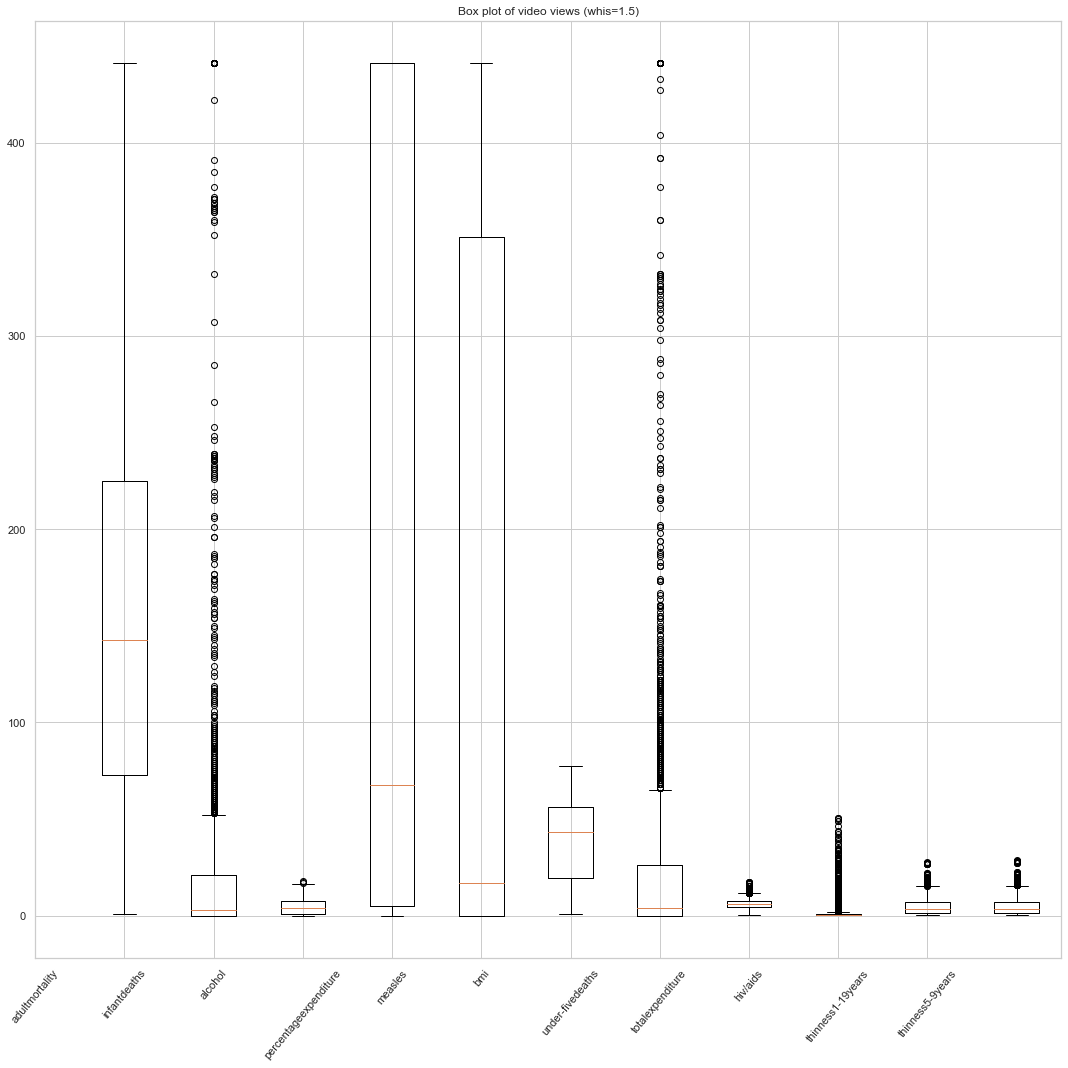

In [309]:
big= ['adultmortality',
       'infantdeaths', 'alcohol', 'percentageexpenditure', 'measles', 'bmi', 'under-fivedeaths', 'totalexpenditure', 'hiv/aids', 'thinness1-19years',
       'thinness5-9years']
plt.figure(figsize=(15,15))
plt.boxplot(big_winsorized_views)
plt.title("Box plot of video views (whis=1.5)")
plt.xticks(np.arange(11), big, rotation=50)
plt.tight_layout()
plt.show()

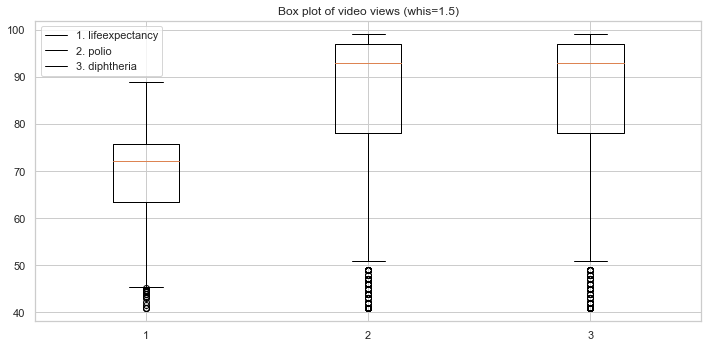

In [307]:
smol= ['lifeexpectancy', 'polio', 'diphtheria']

plt.figure(figsize=(10,5))
plt.boxplot(smol_winsorized_views)
plt.title("Box plot of video views (whis=1.5)")
#plt.xticks(np.arange(3), (smol), rotation=50)

plt.legend(labels=('1. lifeexpectancy', '2. polio', '3. diphtheria'))
plt.tight_layout()
plt.show()

After winsorization, I've determined the following:

need no change = 'bmi'
look good after being winsorized = 'adultmortality',  'measles', 'percentageexpenditure', 'lifeexpectancy', 'polio', 'diptheria'


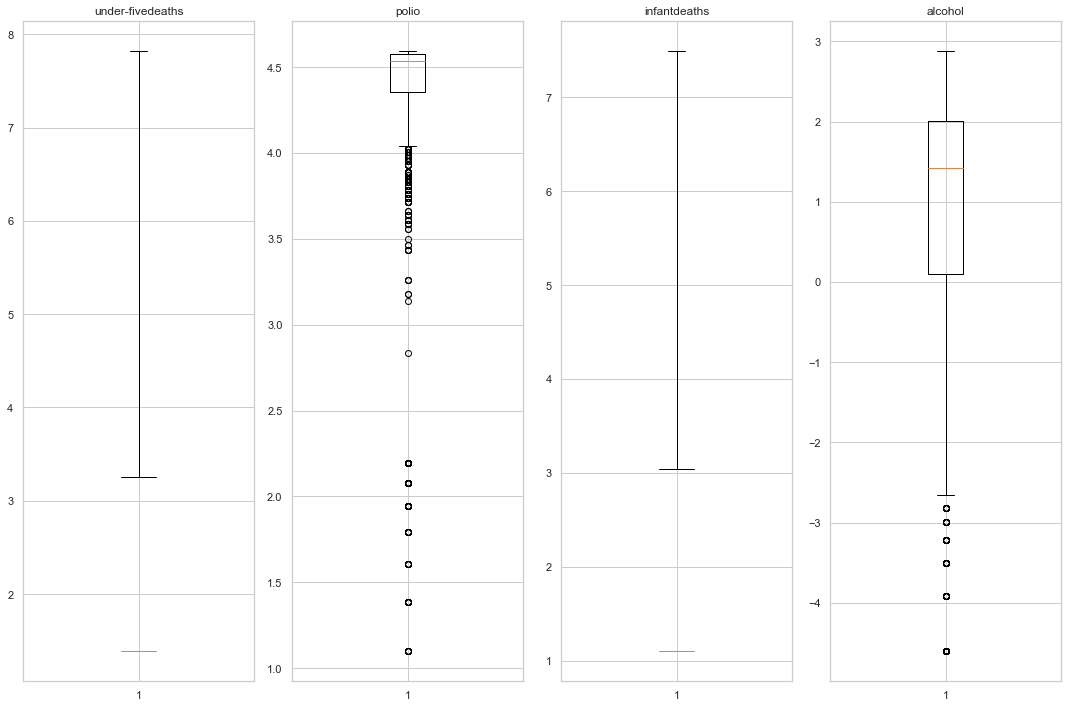

In [331]:
plt.figure(figsize = (15,10))


ax = plt.subplot(1,4,1)
plt.boxplot(np.log(life_expect_cleanest['under-fivedeaths']))
plt.title("under-fivedeaths")

ax = plt.subplot(1,4,2)
plt.boxplot(np.log(life_expect_cleanest['polio'])) 
plt.title('polio')
            
ax = plt.subplot(1,4,3)
plt.boxplot(np.log(life_expect_cleanest['infantdeaths'])) 
plt.title('infantdeaths')
            
ax = plt.subplot(1,4,4)
plt.boxplot(np.log(life_expect_cleanest['alcohol'])) 
plt.title('alcohol')
            
plt.tight_layout()

plt.show()

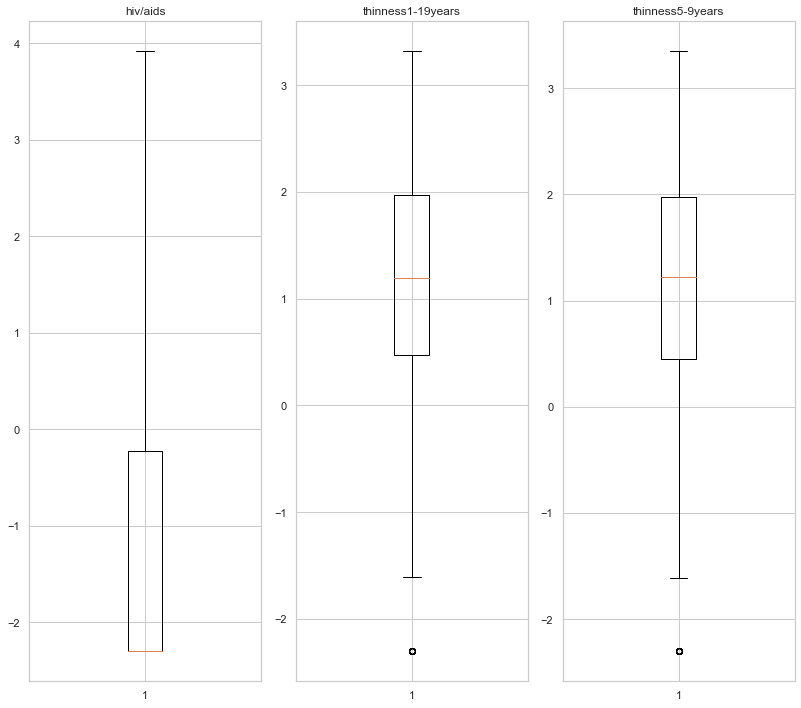

In [345]:
plt.figure(figsize = (15,10))

ax = plt.subplot(1,4,1)
plt.boxplot(np.log(life_expect_cleanest['hiv/aids']), whis = 2, meanline=True) 
plt.title('hiv/aids')
            
ax = plt.subplot(1,4,2)
plt.boxplot(np.log(life_expect_cleanest['thinness1-19years'])) 
plt.title('thinness1-19years')
            
ax = plt.subplot(1,4,3)
plt.boxplot(np.log(life_expect_cleanest['thinness5-9years'])) 
plt.title('thinness5-9years')


plt.tight_layout()
# etc.
plt.show()

Since polio seems to have a lot of outliers, I'm going to not use it as a feature. As for the rest of the log scaled variables, I'm going to test them with Tukey's method.

### Tukey Testing the Transformed

In [346]:
q75, q25 = np.percentile(np.log(life_expect_cleanest['hiv/aids']), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(life_expect_cleanest['hiv/aids']) > max_val) 
                      | (np.log(life_expect_cleanest['hiv/aids']) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 197
The score threshold is: 1.5
Number of outliers is: 65
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [354]:
q75, q25 = np.percentile(life_expect_cleanest['hiv/aids'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((life_expect_cleanest['hiv/aids'] > max_val) 
                      | (life_expect_cleanest['hiv/aids'] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 568
The score threshold is: 1.5
Number of outliers is: 526
The score threshold is: 2.0
Number of outliers is: 458
The score threshold is: 2.5
Number of outliers is: 419
The score threshold is: 3.0
Number of outliers is: 388
The score threshold is: 3.5
Number of outliers is: 359
The score threshold is: 4.0
Number of outliers is: 338
The score threshold is: 4.5
Number of outliers is: 320


In [355]:
q75, q25 = np.percentile(life_expect_cleanest['thinness1-19years'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((life_expect_cleanest['thinness1-19years'] > max_val) 
                      | (life_expect_cleanest['thinness1-19years'] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 179
The score threshold is: 1.5
Number of outliers is: 89
The score threshold is: 2.0
Number of outliers is: 47
The score threshold is: 2.5
Number of outliers is: 21
The score threshold is: 3.0
Number of outliers is: 16
The score threshold is: 3.5
Number of outliers is: 15
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [356]:
q75, q25 = np.percentile(np.log(life_expect_cleanest['thinness1-19years']), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(life_expect_cleanest['thinness1-19years']) > max_val) 
                      | (np.log(life_expect_cleanest['thinness1-19years']) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 94
The score threshold is: 1.5
Number of outliers is: 23
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [357]:
q75, q25 = np.percentile(life_expect_cleanest['thinness5-9years'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((life_expect_cleanest['thinness5-9years'] > max_val) 
                      | (life_expect_cleanest['thinness5-9years'] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 182
The score threshold is: 1.5
Number of outliers is: 97
The score threshold is: 2.0
Number of outliers is: 55
The score threshold is: 2.5
Number of outliers is: 26
The score threshold is: 3.0
Number of outliers is: 16
The score threshold is: 3.5
Number of outliers is: 16
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [358]:
q75, q25 = np.percentile(np.log(life_expect_cleanest['thinness5-9years']), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(life_expect_cleanest['thinness5-9years']) > max_val) 
                      | (np.log(life_expect_cleanest['thinness5-9years']) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 101
The score threshold is: 1.5
Number of outliers is: 31
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [359]:
q75, q25 = np.percentile(life_expect_cleanest['under-fivedeaths'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((life_expect_cleanest['under-fivedeaths'] > max_val) 
                      | (life_expect_cleanest['under-fivedeaths'] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 470
The score threshold is: 1.5
Number of outliers is: 396
The score threshold is: 2.0
Number of outliers is: 344
The score threshold is: 2.5
Number of outliers is: 256
The score threshold is: 3.0
Number of outliers is: 210
The score threshold is: 3.5
Number of outliers is: 186
The score threshold is: 4.0
Number of outliers is: 155
The score threshold is: 4.5
Number of outliers is: 142


In [360]:
q75, q25 = np.percentile(np.log(life_expect_cleanest['under-fivedeaths']), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(life_expect_cleanest['under-fivedeaths']) > max_val) 
                      | (np.log(life_expect_cleanest['under-fivedeaths']) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [361]:
q75, q25 = np.percentile(life_expect_cleanest['infantdeaths'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((life_expect_cleanest['infantdeaths'] > max_val) 
                      | (life_expect_cleanest['infantdeaths'] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 423
The score threshold is: 1.5
Number of outliers is: 329
The score threshold is: 2.0
Number of outliers is: 239
The score threshold is: 2.5
Number of outliers is: 197
The score threshold is: 3.0
Number of outliers is: 174
The score threshold is: 3.5
Number of outliers is: 147
The score threshold is: 4.0
Number of outliers is: 133
The score threshold is: 4.5
Number of outliers is: 124


In [362]:
q75, q25 = np.percentile(np.log(life_expect_cleanest['infantdeaths']), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(life_expect_cleanest['infantdeaths']) > max_val) 
                      | (np.log(life_expect_cleanest['infantdeaths']) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [363]:
q75, q25 = np.percentile(life_expect_cleanest['alcohol'], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((life_expect_cleanest['alcohol'] > max_val) 
                      | (life_expect_cleanest['alcohol'] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 23
The score threshold is: 1.5
Number of outliers is: 3
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [364]:
q75, q25 = np.percentile(np.log(life_expect_cleanest['alcohol']), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(life_expect_cleanest['alcohol']) > max_val) 
                      | (np.log(life_expect_cleanest['alcohol']) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 395
The score threshold is: 1.5
Number of outliers is: 336
The score threshold is: 2.0
Number of outliers is: 289
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


All the variables, except alcohol, improved with log transform as evidenced by the Tukey testing above

After all testing, here are the results for the features:

need no change = 'bmi', 'alcohol

look good after being winsorized = 'adultmortality',  'measles', 'percentageexpenditure', 'lifeexpectancy', 'polio', 'diptheria'

look good with log transform = 'hiv/aids', 'thinness1-19years', 'thinness5-9years', 'under-fivedeaths', 'infantdeaths'

### Univariate / Multivate Exploration

In [374]:
life_expect_cleanest.describe().round(2)

,year,lifeexpectancy,adultmortality,infantdeaths,alcohol,percentageexpenditure,measles,bmi,under-fivedeaths,polio,...,diphtheria,hiv/aids,thinness1-19years,thinness5-9years,winsorized_adultmortality,winsorized_measles,winsorized_percentageexpenditure,winsorized_lifeexpectancy,winsorized_polio,winsorized_diphtheria
count,2896.00,2896.00,2896.00,2896.00,2896.00,2896.00,2896.00,2896.00,2896.00,2896.00,...,2896.00,2896.00,2896.00,2896.00,2896.00,2896.00,2896.00,2896.00,2896.00,2896.00
mean,2007.50,69.35,163.38,30.23,4.63,747.92,2435.77,38.24,41.87,82.67,...,82.44,1.75,4.85,4.88,158.83,1052.65,562.98,69.54,82.76,82.53
std,4.61,9.49,123.89,118.74,3.93,2000.57,11546.05,19.96,161.53,23.30,...,23.62,5.11,4.42,4.51,110.93,2594.34,1150.63,9.06,23.03,23.33
min,2000.00,36.30,1.00,0.00,0.01,0.00,0.00,1.00,0.00,3.00,...,2.00,0.10,0.10,0.10,1.00,0.00,0.00,51.40,9.00,9.00
25%,2003.75,63.48,73.00,0.00,1.10,5.13,0.00,19.30,0.00,78.00,...,78.00,0.10,1.60,1.58,73.00,0.00,5.13,63.48,78.00,78.00
50%,2007.50,72.20,142.50,3.00,4.16,67.66,17.00,43.35,4.00,93.00,...,93.00,0.10,3.30,3.40,142.50,17.00,67.66,72.20,93.00,93.00
75%,2011.25,75.70,225.00,21.00,7.45,454.42,351.25,56.10,26.00,97.00,...,97.00,0.80,7.20,7.20,225.00,351.25,454.42,75.70,97.00,97.00
max,2015.00,89.00,723.00,1800.00,17.87,19479.91,212183.00,77.60,2500.00,99.00,...,99.00,50.60,27.70,28.60,411.00,10315.00,4540.54,89.00,99.00,99.00


In [380]:
life_expect_cleanest.describe(include='O')

,country,status
count,2896,2896
unique,181,2
top,Cabo Verde,Developing
freq,16,2384


In [369]:
life_expect_cleanest["winsorized_adultmortality"] = winsorized_views = winsorize(life_expect_cleanest["adultmortality"], (0, 0.05))
life_expect_cleanest["winsorized_measles"] = winsorized_views = winsorize(life_expect_cleanest["measles"], (0, 0.05))
life_expect_cleanest["winsorized_percentageexpenditure"] = winsorized_views = winsorize(life_expect_cleanest["percentageexpenditure"], (0, 0.05))
life_expect_cleanest["winsorized_lifeexpectancy"] = winsorized_views = winsorize(life_expect_cleanest["lifeexpectancy"], (0.05, 0))
life_expect_cleanest["winsorized_polio"] = winsorized_views = winsorize(life_expect_cleanest["polio"], (0.05, 0))
life_expect_cleanest["winsorized_diphtheria"] = winsorized_views = winsorize(life_expect_cleanest["diphtheria"], (0.05, 0))

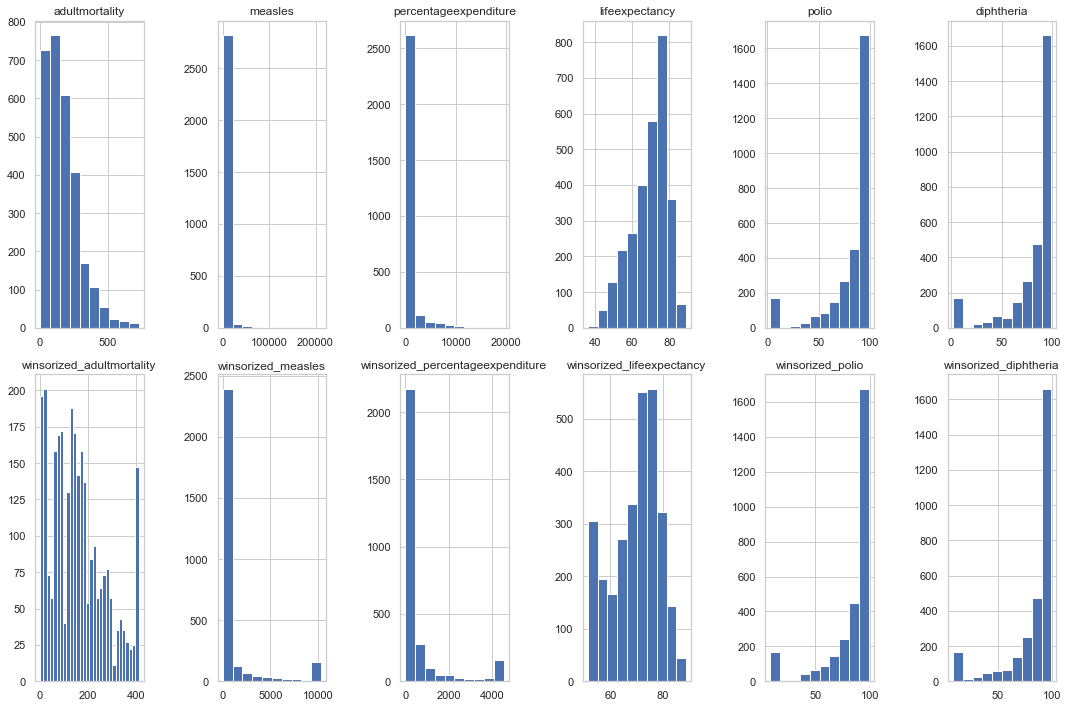

In [412]:
plt.figure(figsize = (15,10))

#normal data
ax = plt.subplot(2,6,1)
plt.hist(life_expect_cleanest['adultmortality']) 
plt.title('adultmortality')

ax = plt.subplot(2,6,2)
plt.hist(life_expect_cleanest['measles'])
plt.title("measles")

ax = plt.subplot(2,6,3)
plt.hist(life_expect_cleanest['percentageexpenditure'])
plt.title('percentageexpenditure')
            
ax = plt.subplot(2,6,4)
plt.hist(life_expect_cleanest['lifeexpectancy']) 
plt.title('lifeexpectancy')

ax = plt.subplot(2,6,5)
plt.hist(life_expect_cleanest['polio']) 
plt.title('polio')

ax = plt.subplot(2,6,6)
plt.hist(life_expect_cleanest['diphtheria']) 
plt.title('diphtheria')


#winsor data

ax = plt.subplot(2,6,7)
plt.hist(life_expect_cleanest['winsorized_adultmortality'], bins=30) 
plt.title('winsorized_adultmortality')
                      
ax = plt.subplot(2,6,8)
plt.hist(life_expect_cleanest['winsorized_measles']) 
plt.title('winsorized_measles')

ax = plt.subplot(2,6,9)
plt.hist(life_expect_cleanest['winsorized_percentageexpenditure']) 
plt.title('winsorized_percentageexpenditure')
            
ax = plt.subplot(2,6,10)
plt.hist(life_expect_cleanest['winsorized_lifeexpectancy'])
plt.title('winsorized_lifeexpectancy')
            
ax = plt.subplot(2,6,11)
plt.hist(life_expect_cleanest['winsorized_polio']) 
plt.title('winsorized_polio')

ax = plt.subplot(2,6,12)
plt.hist(life_expect_cleanest['winsorized_diphtheria']) 
plt.title('winsorized_diphtheria')


            
plt.tight_layout()

plt.show()

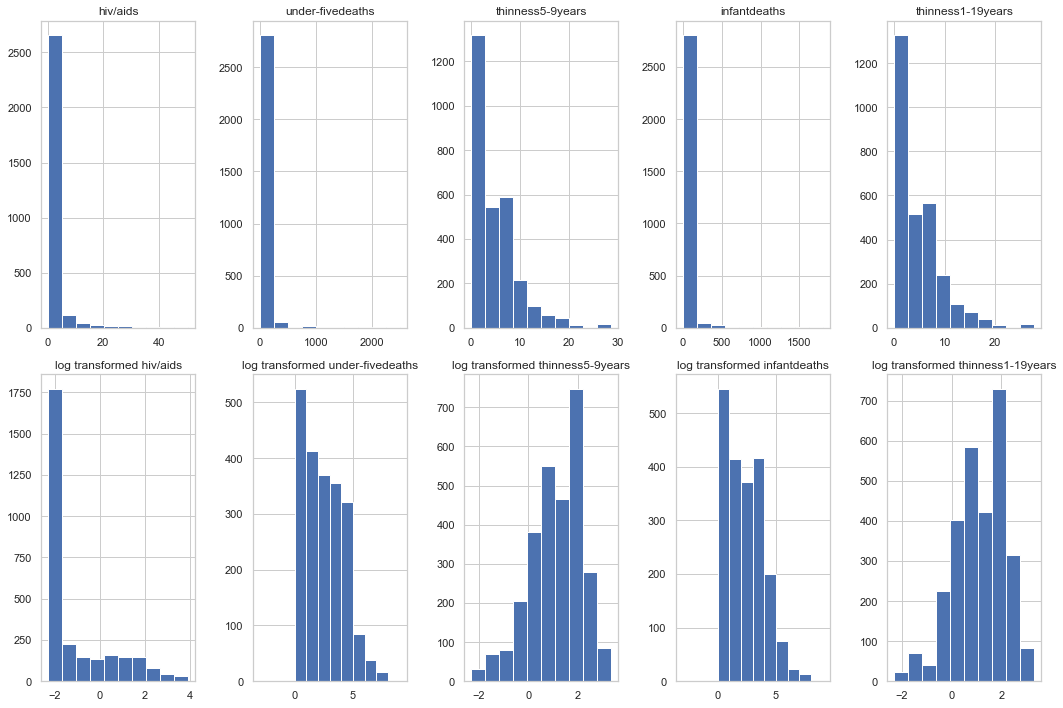

In [407]:
plt.figure(figsize = (15,10))

#normal data
ax = plt.subplot(2,5,1)
plt.hist(life_expect_cleanest['hiv/aids']) 
plt.title('hiv/aids')

ax = plt.subplot(2,5,2)
plt.hist(life_expect_cleanest['under-fivedeaths'])
plt.title("under-fivedeaths")

ax = plt.subplot(2,5,3)
plt.hist(life_expect_cleanest['thinness5-9years'])
plt.title('thinness5-9years')
            
ax = plt.subplot(2,5,4)
plt.hist(life_expect_cleanest['infantdeaths']) 
plt.title('infantdeaths')

ax = plt.subplot(2,5,5)
plt.hist(life_expect_cleanest['thinness1-19years']) 
plt.title('thinness1-19years')

#log data

ax = plt.subplot(2,5,6)
plt.hist(np.log(life_expect_cleanest['hiv/aids'])) 
plt.title('log transformed hiv/aids')
                      
ax = plt.subplot(2,5,7)
plt.hist(np.log(life_expect_cleanest['under-fivedeaths']), range(-3,10)) 
plt.title('log transformed under-fivedeaths')

ax = plt.subplot(2,5,8)
plt.hist(np.log(life_expect_cleanest['thinness5-9years'])) 
plt.title('log transformed thinness5-9years')
            
ax = plt.subplot(2,5,9)
plt.hist(np.log(life_expect_cleanest['infantdeaths']), range(-3,10)) 
plt.title('log transformed infantdeaths')
            
ax = plt.subplot(2,5,10)
plt.hist(np.log(life_expect_cleanest['thinness1-19years'])) 
plt.title('log transformed thinness1-19years')

            
plt.tight_layout()

plt.show()

Based on this visualization, we see that log transforming variables 'thinness5-9years', 'under-fivedeaths', 'thinness1-19years', 'infantdeaths' made it so that the outliers were less impactful on distribution, allowing us to have normalized distributions to work with.

After all testing, here are the results for the features:

need no change = 'bmi', 'alcohol'

look good after being winsorized = 'adultmortality',  'measles', 'percentageexpenditure', 'lifeexpectancy', 'polio', 'diptheria'

look normalized with transform = 'thinness1-19years', 'thinness5-9years', 'under-fivedeaths', 'infantdeaths'

Ones that have been dropped due to non-normalized distribution or other reasons: 'hiv/aids'

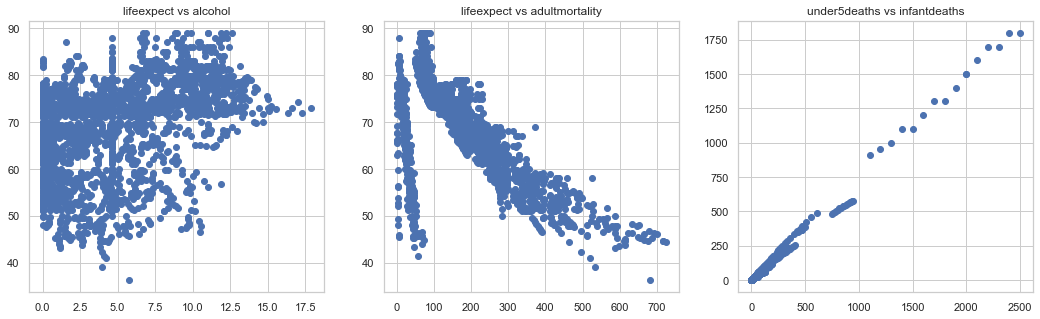

In [422]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(life_expect_cleanest["alcohol"], life_expect_cleanest["lifeexpectancy"])
plt.title("lifeexpect vs alcohol")

plt.subplot(1,3,2)
plt.scatter(life_expect_cleanest["adultmortality"], life_expect_cleanest["lifeexpectancy"])
plt.title("lifeexpect vs adultmortality")

plt.subplot(1,3,3)
plt.scatter(life_expect_cleanest["under-fivedeaths"], life_expect_cleanest["infantdeaths"])
plt.title("under5deaths vs infantdeaths")

plt.show()

In [428]:
life_expect_cleanest.corr()

,year,lifeexpectancy,adultmortality,infantdeaths,alcohol,percentageexpenditure,measles,bmi,under-fivedeaths,polio,...,diphtheria,hiv/aids,thinness1-19years,thinness5-9years,winsorized_adultmortality,winsorized_measles,winsorized_percentageexpenditure,winsorized_lifeexpectancy,winsorized_polio,winsorized_diphtheria
year,1.000000,0.170500,-0.080389,-0.036411,-0.045214,0.032748,-0.082316,0.104668,-0.041853,0.096108,...,0.136387,-0.139882,-0.045082,-0.048152,-0.062877,-0.149757,0.007431,0.161258,0.096311,0.136642
lifeexpectancy,0.170500,1.000000,-0.693411,-0.197326,0.393457,0.380944,-0.160447,0.567694,-0.223072,0.463889,...,0.477909,-0.560010,-0.477183,-0.471584,-0.680958,-0.253359,0.448647,0.995113,0.464856,0.479193
adultmortality,-0.080389,-0.693411,1.000000,0.078657,-0.190184,-0.241059,0.032542,-0.387017,0.093791,-0.271463,...,-0.271931,0.526491,0.302904,0.308457,0.978912,0.118437,-0.288167,-0.686772,-0.272352,-0.273055
infantdeaths,-0.036411,-0.197326,0.078657,1.000000,-0.113823,-0.085506,0.501175,-0.227480,0.996636,-0.171612,...,-0.175949,0.025496,0.465700,0.471340,0.088991,0.474002,-0.108376,-0.202005,-0.172324,-0.176617
alcohol,-0.045214,0.393457,-0.190184,-0.113823,1.000000,0.339040,-0.051590,0.326476,-0.110597,0.214185,...,0.215571,-0.051018,-0.421339,-0.410190,-0.203119,-0.138613,0.378782,0.406213,0.214963,0.216357
percentageexpenditure,0.032748,0.380944,-0.241059,-0.085506,0.339040,1.000000,-0.057154,0.231130,-0.087613,0.146890,...,0.143189,-0.098110,-0.252397,-0.253931,-0.256132,-0.085159,0.894826,0.391614,0.147464,0.143671
measles,-0.082316,-0.160447,0.032542,0.501175,-0.051590,-0.057154,1.000000,-0.176069,0.507917,-0.137791,...,-0.143326,0.031186,0.224579,0.220836,0.033308,0.652524,-0.070978,-0.158094,-0.138114,-0.144073
bmi,0.104668,0.567694,-0.387017,-0.227480,0.326476,0.231130,-0.176069,1.000000,-0.237910,0.287221,...,0.285722,-0.243735,-0.530805,-0.537784,-0.402735,-0.273228,0.278344,0.575375,0.287872,0.286373
under-fivedeaths,-0.041853,-0.223072,0.093791,0.996636,-0.110597,-0.087613,0.507917,-0.237910,1.000000,-0.189620,...,-0.196436,0.038360,0.467771,0.472244,0.104607,0.478014,-0.111205,-0.227199,-0.190306,-0.197116
polio,0.096108,0.463889,-0.271463,-0.171612,0.214185,0.146890,-0.137791,0.287221,-0.189620,1.000000,...,0.668335,-0.160812,-0.222511,-0.223299,-0.287523,-0.226618,0.180787,0.467557,0.999798,0.669687


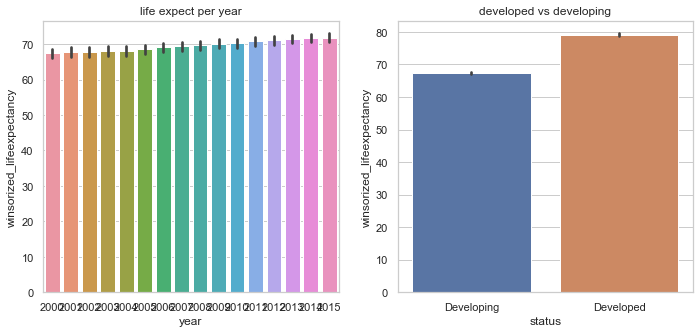

In [432]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(life_expect_cleanest["year"], life_expect_cleanest["winsorized_lifeexpectancy"])
plt.title("life expect per year")

plt.subplot(1,3,2)
sns.barplot(life_expect_cleanest["status"], life_expect_cleanest["winsorized_lifeexpectancy"])
plt.title("developed vs developing")


plt.show()

Features that have strong correlation (over 50%) with our target variable of life expectancy are:
* 'adultmortality'
* 'bmi'
* 'hiv/aids'

We also have some additional categorical data that shows that more developed countries have a higher life expectancy and that as the years progress the mean amount of life expentency incrementally increases.